## Predicting Sale Price of Houses Using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of houses.

## 1. Problem defition

> How well can we predict the future sale price of a house, given its characteristics and previous examples of how much similar houses have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for House Prices competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

There are 3 main datasets:

* Train.csv is the training set, which contains data from previous sales.
* Test.csv is the test set. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training set
df = pd.read_csv("data/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# Checking missing data
pd.set_option('display.max_rows', None)
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

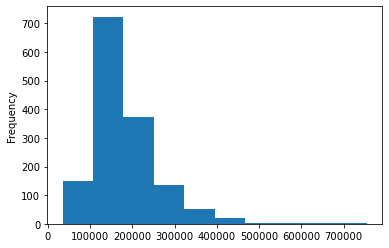

In [9]:
# Checking Slae Price Distribution
df.SalePrice.plot.hist();

In [15]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [4]:
# Sort dataframe by sale date
df.sort_values(['YrSold', 'MoSold'], inplace = True, ascending=[True, True])

## Make a copy of the original dataframe
We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [5]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [6]:
# Check the values of different columns by Neighborhood
df_tmp.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [21]:
len(df_tmp)

1460

### Convert strings to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [7]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [8]:
# Let's turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [9]:
# Let's check the datatypes again
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 141 to 1421
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   

Now let's take care of the missing data:

In [25]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

## Fill Missing Data
### Filling Numerical Data

In [10]:
# Let's find numerical columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [11]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [12]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [13]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [14]:
# Check to see how many examples were missing
df_tmp.LotFrontage_is_missing.value_counts()

False    1201
True      259
Name: LotFrontage_is_missing, dtype: int64

### Filling and turning categorical variables into numbers

In [15]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [16]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [36]:
# Let's check our dataframe again
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 141 to 1421
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 571.7 KB


In [37]:
df_tmp.head().T

,141,169,302,370,411
Id,142,170,303,371,412
MSSubClass,20,20,20,60,190
MSZoning,4,4,4,4,4
LotFrontage,78,69,118,69,100
LotArea,11645,16669,13704,8121,34650
Street,2,2,2,2,2
Alley,0,0,0,0,0
LotShape,4,1,1,1,4
LandContour,4,4,4,4,1
Utilities,1,1,1,1,1


In [38]:
# And let's check for missing values again:
df_tmp.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
Street                      0
Alley                       0
LotShape                    0
LandContour                 0
Utilities                   0
LotConfig                   0
LandSlope                   0
Neighborhood                0
Condition1                  0
Condition2                  0
BldgType                    0
HouseStyle                  0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
RoofStyle                   0
RoofMatl                    0
Exterior1st                 0
Exterior2nd                 0
MasVnrType                  0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
Foundation                  0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinTyp

Awesome! No missing values, and all data are in either numerical or categorical form, ready to be used in building our model

## Modelling

In [17]:
# Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor

In [18]:
%%time
# Instantiate our model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Wall time: 1.11 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [19]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9807257739038995

As this score is not reliable, let's split our data into training and validation sets and score it again:

In [20]:
# Splitting our data to training and validation sets
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(42)

X_train, X_valid, y_train, y_valid = train_test_split(df_tmp.drop("SalePrice", axis=1),
                                                  df_tmp["SalePrice"],
                                                  test_size=0.2)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 126), (1168,), (292, 126), (292,))

### Building an evaluation function

In [21]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Validation MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Validation RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Validation R^2": r2_score(y_valid, val_preds)}
    return scores

Let's build our model with new data split

In [22]:
%%time
model = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)

model.fit(X_train, y_train)

Wall time: 906 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [23]:
# Let's evaluate our new model with our function
show_scores(model)

{'Training MAE': 6590.343022260274,
 'Validation MAE': 18221.981952054797,
 'Training RMSLE': 0.05960142343186669,
 'Validation RMSLE': 0.1530657437801109,
 'Training R^2': 0.9805438386925744,
 'Validation R^2': 0.8172603679200526}

### Hyerparameter Tuning to Improve Our Model

In [65]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(100, 1000, 10),
           "max_depth": [None, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "bootstrap": [True, False]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 14.3min finished


Wall time: 14min 21s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20, 30, 40,
                                                      50, 60, 70, 80, 90, 100],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': a...0, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
       360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
       490, 500, 510, 520, 530, 540, 550, 560,

In [71]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 980,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 50,
 'bootstrap': True}

In [72]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6227.037739376573,
 'Validation MAE': 16391.908376432762,
 'Training RMSLE': 0.05779013508941374,
 'Validation RMSLE': 0.14519726910026143,
 'Training R^2': 0.9824243470936118,
 'Validation R^2': 0.8306619167462873}

## Make predictions on test data

In [24]:
# Import the test data
df_test = pd.read_csv("data/test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [25]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    return df

In [26]:
df_test = preprocess_data(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 134 entries, Id to SaleCondition_is_missing
dtypes: bool(54), float64(11), int64(26), int8(43)
memory usage: 560.1 KB


In [ ]:
test_preds = rs_model.predict(df_test)

In [28]:
# We can find how the columns differ using sets
missing_cols = set(df_test.columns) - set(X_train.columns)
missing_cols

{'BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageArea_is_missing',
 'GarageCars_is_missing',
 'TotalBsmtSF_is_missing'}

In [29]:
# Manually adjust df_train to have missing columns
for col in missing_cols:
    df_tmp[col] = False

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 141 to 1421
Columns: 135 entries, Id to BsmtFinSF1_is_missing
dtypes: bool(54), float64(3), int64(35), int8(43)
memory usage: 583.1 KB


Now we build the model again using the new training dataframe

In [30]:
# Splitting our data to training and validation sets
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(42)

X_train, X_valid, y_train, y_valid = train_test_split(df_tmp.drop("SalePrice", axis=1),
                                                  df_tmp["SalePrice"],
                                                  test_size=0.2)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 134), (1168,), (292, 134), (292,))

In [31]:
# Check to see train and test dataframe columns are the same now
set(df_test.columns) - set(X_train.columns)

set()

In [32]:
%%time
model = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)

model.fit(X_train, y_train)

Wall time: 935 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [33]:
# Let's evaluate our new model with our function
show_scores(model)

{'Training MAE': 6546.790299657534,
 'Validation MAE': 18239.0425,
 'Training RMSLE': 0.05931995547608318,
 'Validation RMSLE': 0.15243378284601314,
 'Training R^2': 0.9807154152912987,
 'Validation R^2': 0.8292107607553254}

### Hyerparameter Tuning to Improve Our Model

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
%%time

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(100, 1000, 20),
           "max_depth": [None, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "bootstrap": [True, False]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 12.8min finished


Wall time: 12min 53s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20, 30, 40,
                                                      50, 60, 70, 80, 90, 100],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340,
       360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600,
       620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860,
       880,

In [127]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 720,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 20,
 'bootstrap': True}

In [128]:
show_scores(rs_model)

{'Training MAE': 10439.895066960526,
 'Validation MAE': 16804.13059892661,
 'Training RMSLE': 0.09134848362843695,
 'Validation RMSLE': 0.14720064865957824,
 'Training R^2': 0.9526692377804481,
 'Validation R^2': 0.825904520719312}

In [129]:
# Make predictions on the test data
test_preds = rs_model.predict(df_test)

In [131]:
df_test.head().T

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,3,4,4,4,4
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,2,2,2,2,2
Alley,0,0,0,0,0
LotShape,4,1,1,1,1
LandContour,4,4,4,4,2
Utilities,1,1,1,1,1


In [135]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds

,Id,SalePrice
0,1461,124821.867309
1,1462,155642.970542
2,1463,178729.662941
3,1464,184317.081872
4,1465,205330.121611
5,1466,185155.064542
6,1467,168329.748667
7,1468,175118.661464
8,1469,177652.040085
9,1470,124658.166759


In [ ]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv", index=False)

### Hyerparameter Tuning to Improve Our Model

In [194]:
%%time
# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(100, 2000, 20),
           "max_depth": [None, 10, 30, 50, 70, 100, 200],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "min_weight_fraction_leaf" : [0, 0.1, 0.3, 0.5],
           "max_leaf_nodes": [None, 2, 5, 10],
           "max_features": [0.5, 1, "sqrt", "auto", "log2"],
           "bootstrap": [True, False]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 19.5min finished


Wall time: 19min 39s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 30, 50, 70, 100,
                                                      200],
                                        'max_features': [0.5, 1, 'sqrt', 'auto',
                                                         'log2'],
                                        'max_leaf_nodes': [None, 2, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14...
        540,  560,  580,  600,  620,  640,  660,  680,  700,  720,  740,
        760,  780,  800,  820,  840,  860,  880,  900,  920,  940,  960,
        980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180,
      

In [195]:
rs_model.best_params_

{'n_estimators': 940,
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [55]:
test_preds = rs_model.predict(df_test)

In [102]:
# Format and export prediction data

df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds

,Id,SalePrice
0,1461,136006.750000
1,1462,164269.843750
2,1463,188392.500000
3,1464,193956.000000
4,1465,189585.593750
5,1466,164011.906250
6,1467,198700.453125
7,1468,165010.640625
8,1469,183695.906250
9,1470,125993.531250


In [198]:
df_preds.to_csv("data/test_predictions.csv", index=False)

After submitting the test file in Kaggle, we get the score of 0.14942. Let's check if other models give us better results.

## GBR model

In [56]:
# import and define the model
from sklearn.ensemble import GradientBoostingRegressor
gbr  = GradientBoostingRegressor()
gbr.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

GradientBoostingRegressor()

In [37]:
gbr.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9647221443187248

## Hyperparameter Tuning for GBR Model

In [38]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [41]:
%%time
# Different RandomForestRegressor hyperparameters
gbr_grid = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.9],
            'max_depth': [2, 4, 6, 8, 10],
            'min_samples_leaf': np.arange(2, 20, 2),
            'min_samples_split': np.arange(2, 20, 2),
            'n_estimators': [50, 100, 500, 1000, 1500],
            }

# Instantiate RandomizedSearchCV model
rs_gbr = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
                              param_distributions=gbr_grid,
                              n_iter=100,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_gbr.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 78.3min finished


Wall time: 1h 18min 20s


RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'alpha': [0.0001, 0.001, 0.005, 0.01,
                                                  0.1, 0.9],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [50, 100, 500, 1000,
                                                         1500]},
                   verbose=True)

In [51]:
rs_gbr.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 16,
 'max_depth': 8,
 'alpha': 0.1}

In [52]:
rs_gbr.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9653300766743277

In [103]:
# Format and export prediction data

test_preds = rs_gbr.predict(df_test)
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds.to_csv("data/test_predictions.csv", index=False)

Evaluating these predictions of test data in Kaggle, gives us a 0.13629 score. Let's see if we can improve it even more:

Using a more powerful processor (IBM Watson Studio) we came up with these hyperparameters:
* {'n_estimators': 500,
*  'min_samples_split': 6,
*  'min_samples_leaf': 2,
*  'max_leaf_nodes': None,
*  'max_features': 0.5,
*  'max_depth': 4,
*  'alpha': 0.01}

Let's see what score it gives us:

In [45]:
gbr_best = GradientBoostingRegressor(n_estimators = 500,
                                     min_samples_split = 6,
                                     min_samples_leaf = 2,
                                     max_leaf_nodes = None,
                                     max_features = 0.5,
                                     max_depth = 4,
                                     alpha = 0.01)
gbr_best.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

GradientBoostingRegressor(alpha=0.01, max_depth=4, max_features=0.5,
                          min_samples_leaf=2, min_samples_split=6,
                          n_estimators=500)

In [46]:
gbr_best.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9980063898651768

In [105]:
# Format and export prediction data

test_preds = gbr_best.predict(df_test)
del df_preds
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds.to_csv("data/test_predictions.csv", index=False)

Evaluating these predictions of test data in Kaggle, gives us a 0.13181 score which is our best so far.

## Lasso model

In [57]:
# import and define the model
from sklearn.linear_model import Lasso
lass  = Lasso()
lass.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

C:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556617723052.4225, tolerance: 920791133.4609977
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [58]:
lass.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.8757484753055981

## Hyperparameter Tuning for Lasso Model

In [60]:
lass.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [68]:
%%time
# Different RandomForestRegressor hyperparameters
lass_grid = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.9],
            'max_iter': [5000, 10000, 50000],
            'tol': [0.00001, 0.0001, 0.001, 0.01],
            'selection': ['cyclic', 'random']
            }

# Instantiate RandomizedSearchCV model
rs_lass = RandomizedSearchCV(Lasso(random_state=42),
                              param_distributions=lass_grid,
                              n_iter=20,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_lass.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10896898050.498535, tolerance: 721596393.2829719
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410957210708.1188, tolerance: 73253544013.02435
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434891019262.6565, tolerance: 70785063672.55684
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mahdi\anaconda3\li

C:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352544788290.26776, tolerance: 770301348.0373521
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462947067926.45605, tolerance: 721596393.2829719
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483828635109.66895, tolerance: 750483544.0992856
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

Wall time: 2min 27s


RandomizedSearchCV(estimator=Lasso(random_state=42), n_iter=20,
                   param_distributions={'alpha': [0.0001, 0.001, 0.005, 0.01,
                                                  0.1, 0.9],
                                        'max_iter': [5000, 10000, 50000],
                                        'selection': ['cyclic', 'random'],
                                        'tol': [1e-05, 0.0001, 0.001, 0.01]},
                   verbose=True)

In [69]:
rs_lass.best_params_

{'tol': 0.01, 'selection': 'random', 'max_iter': 50000, 'alpha': 0.9}

In [70]:
rs_lass.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.8757499769871421

In [106]:
# Format and export prediction data

test_preds = rs_lass.predict(df_test)
del df_preds
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds.to_csv("data/test_predictions.csv", index=False)

As we can't see any significant improvements, let's get to try the next model.

## XGBoost

In [74]:
# installing and importing
!pip install xgboost
import xgboost
from xgboost import XGBRegressor

In [83]:
#fit the model
xgb  = XGBRegressor()
xgb.fit(df_tmp.drop("SalePrice", axis=1).values, df_tmp["SalePrice"].values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
xgb.score(df_tmp.drop("SalePrice", axis=1).values, df_tmp["SalePrice"].values)

0.9997215652443219

## Hyperparameter Tuning for XGBoost Model

In [89]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [92]:
%%time
# Different RandomForestRegressor hyperparameters
xgbr_grid = {'max_depth': [2, 4, 6, 8, 10],
            'min_samples_leaf': np.arange(2, 20, 2),
            'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'colsample_bynode': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'n_estimators': [100, 500, 1000],
            'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
            'gamma': [0, 0.25, 0.5, 1.0]
            }

# Instantiate RandomizedSearchCV model
rs_xgbr = RandomizedSearchCV(xgb,
                              param_distributions=xgbr_grid,
                              n_iter=10,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_xgbr.fit(df_tmp.drop("SalePrice", axis=1).values, df_tmp["SalePrice"].values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[11:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[11:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are onl

[11:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are onl

[11:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are onl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


[11:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 2min 19s


RandomizedSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_parallel...
                   param_distributions={'colsample_bylevel': [0.4, 0.5, 0.6,
                                                              0.7, 0.8, 0.9,
             

In [93]:
rs_xgbr.best_params_

{'n_estimators': 1000,
 'min_samples_leaf': 6,
 'min_child_weight': 3.0,
 'max_depth': 4,
 'gamma': 0,
 'colsample_bytree': 0.5,
 'colsample_bynode': 1.0,
 'colsample_bylevel': 0.4}

In [94]:
rs_xgbr.score(df_tmp.drop("SalePrice", axis=1).values, df_tmp["SalePrice"].values)

0.9999985729076609

In [107]:
# Format and export prediction data

df_test2 = df_test.values
test_preds = rs_xgbr.predict(df_test2)
del df_preds
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds.to_csv("data/test_predictions.csv", index=False)

Evaluating these predictions of test data in Kaggle, gives us a 0.14093 score which is worse than GBR.

Having tested different regressor models, our best results come from Gradient Boost Regressor, which gives us RMSE value of 0.13181.